In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",150)
sns.set_style("darkgrid")
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.facecolor"]

'white'

In [3]:
df = pd.read_csv("weatherAUS.csv")

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
#Too much Null Values
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
#We will be removig those rows where target column is Nan as it is not good for model to be trained on
df.dropna(subset = ["RainTomorrow"],inplace = True)

In [8]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [9]:
df["RainTomorrow"].isna().sum()

0

***Visualizing the data like how many rows on each year so we can decide how much data should be in train , validation and in test***

***Train Set : 60%
   Test Set : 30%
   Validation set : 10%***

<Axes: title={'center': 'No of Rows per Year'}, xlabel='Date', ylabel='count'>

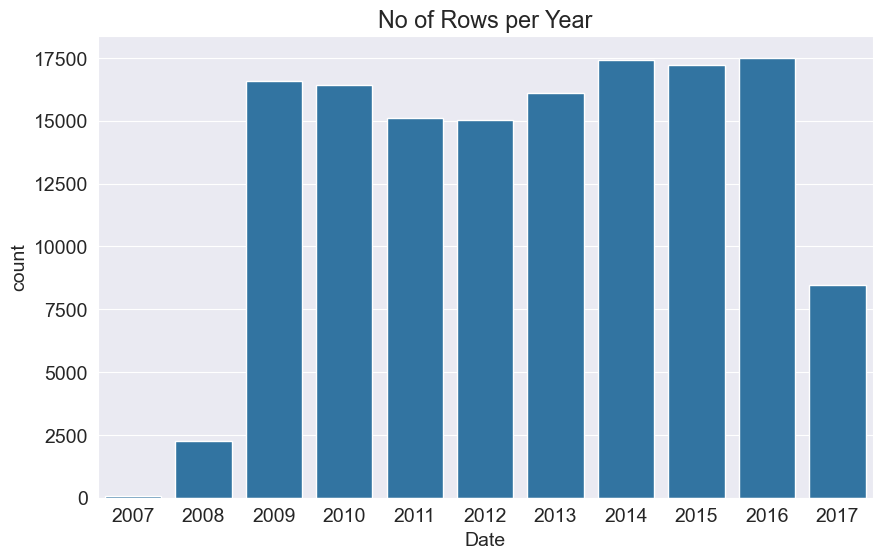

In [10]:
plt.title("No of Rows per Year")
sns.countplot(x = pd.to_datetime(df.Date).dt.year)

In [11]:
#we are spliting data based on date as there is a column showing order if data is random we use train test split
year = pd.to_datetime(df.Date).dt.year
train_df = df[year<2015]
val_df = df[year == 2015]
test_df = df[year>2015]

In [12]:
train_df.shape

(98988, 23)

In [13]:
val_df.shape

(17231, 23)

In [14]:
test_df.shape

(25974, 23)

***we are reomving date column because we are using this model to be predicted for future dates and removing target column as well as we dont add target column in a ML algo***

In [15]:
input_cols = list(train_df.columns)[1:-1]
target_col = "RainTomorrow"

In [16]:
#for training
X_train = train_df[input_cols].copy()
y_train = train_df[target_col].copy()

In [17]:
#for validating
val_input = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

In [18]:
#For Testing
X_test = test_df[input_cols].copy()
y_test = test_df[target_col].copy()

In [19]:
num_cols = [x for x in X_train.columns if X_train[x].dtype!="object"]

In [20]:
cat_Cols = [x for x in X_train.columns if X_train[x].dtype == "object"]

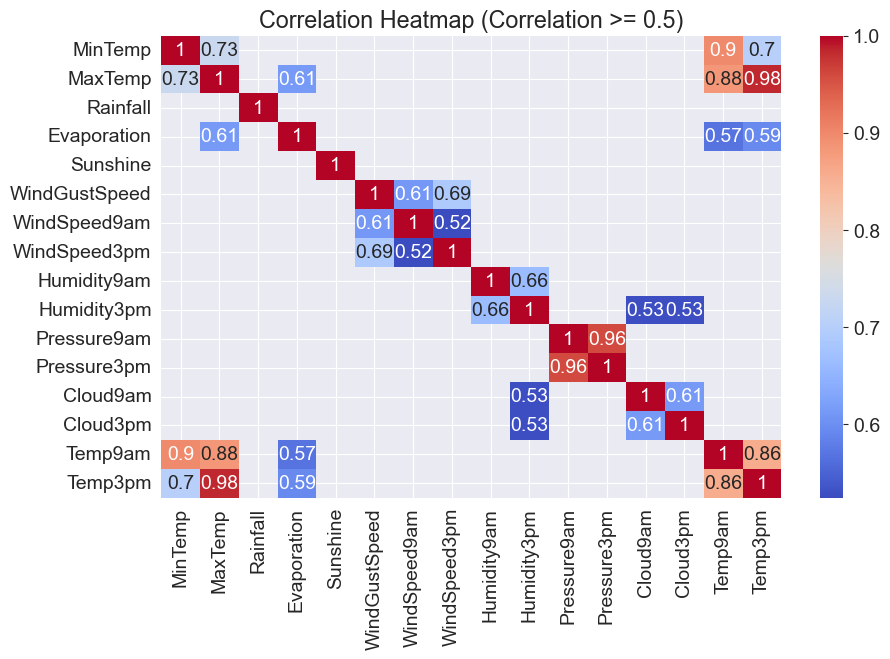

In [21]:
corr_matrix = X_train[num_cols].corr()

# Filter the correlation matrix to keep values above 0.5
high_corr_matrix = corr_matrix[corr_matrix >= 0.5]

# Create the heatmap
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Correlation >= 0.5)')
plt.show()

***Imputing Missing Values in to the Dataframe***

In [22]:
X_train[num_cols].isna().sum()

MinTemp            434
MaxTemp            198
Rainfall          1000
Evaporation      37110
Sunshine         40696
WindGustSpeed     6902
WindSpeed9am      1133
WindSpeed3pm      1140
Humidity9am       1265
Humidity3pm       1186
Pressure9am       9345
Pressure3pm       9309
Cloud9am         35764
Cloud3pm         36766
Temp9am            783
Temp3pm            663
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(strategy='mean').fit(df[num_cols])

In [25]:
X_train[num_cols] = imputer.transform(X_train[num_cols])
val_input[num_cols] = imputer.transform(val_input[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])


***Scaling Numeric Features Into A one Scale***

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler().fit(df[num_cols])

In [28]:
X_train[num_cols] = scaler.transform(X_train[num_cols])
val_input[num_cols] = scaler.transform(val_input[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

***ENCODING CATEGORICAL DATA***

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
train_df[cat_Cols].fillna("Unknown",inplace= True)
val_input[cat_Cols].fillna("Unknown", inplace= True)
X_test[cat_Cols].fillna("Unknown", inplace= True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_1580\400977871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[cat_Cols].fillna("Unknown",inplace= True)
C:\Users\Pc\AppData\Local\Temp\ipykernel_1580\400977871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_input[cat_Cols].fillna("Unknown", inplace= True)
C:\Users\Pc\AppData\Local\Temp\ipykernel_1580\400977871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cat_

In [31]:
encoder = OneHotEncoder(sparse = False, handle_unknown = "ignore").fit(df[cat_Cols])

C:\Users\Pc\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
encoded_cols = encoder.get_feature_names_out(cat_Cols)

In [33]:
X_train[encoded_cols] = encoder.transform(X_train[cat_Cols])
val_input[encoded_cols] = encoder.transform(val_input[cat_Cols])
X_test[encoded_cols] = encoder.transform(X_test[cat_Cols])

C:\Users\Pc\AppData\Local\Temp\ipykernel_1580\3041278021.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[encoded_cols] = encoder.transform(X_train[cat_Cols])
C:\Users\Pc\AppData\Local\Temp\ipykernel_1580\3041278021.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[encoded_cols] = encoder.transform(X_train[cat_Cols])
C:\Users\Pc\AppData\Local\Temp\ipykernel_1580\3041278021.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

In [34]:
X_test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,NaN,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [41]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

now we are dropping cat col data which is not scaled

In [42]:
X_train = pd.concat([X_train[num_cols],X_train[encoded_cols]],axis = 1)

In [44]:
X_val = pd.concat([val_input[num_cols],val_input[encoded_cols]],axis = 1)

In [46]:
X_test = pd.concat([X_test[num_cols],X_test[encoded_cols]],axis = 1)

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
DT = DecisionTreeClassifier(random_state=42)

DT.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [56]:
y_pred = DT.predict(X_test)

In [59]:
pred_df = pd.DataFrame({"predicted_val":y_pred,"ActualValue":y_test})

In [60]:
pred_df

,predicted_val,ActualValue
2498,No,No
2499,No,Yes
2500,Yes,Yes
2501,Yes,Yes
2502,No,No
...,...,...
145454,No,No
145455,No,No
145456,No,No
145457,No,No


In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [62]:
accuracy_score(y_pred,y_test)

0.7741202741202741

In [83]:
#Direct use of score can also show you accuracy cause it is fit on X_train and X_val also have same type of data 
DT.score(X_val,val_target)

0.7921188555510418

In [84]:
val_target.value_counts()/len(val_target)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

# REDUCING OVERFITTING FROM THE DATA

***Visualizing DT on our data***

In [85]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

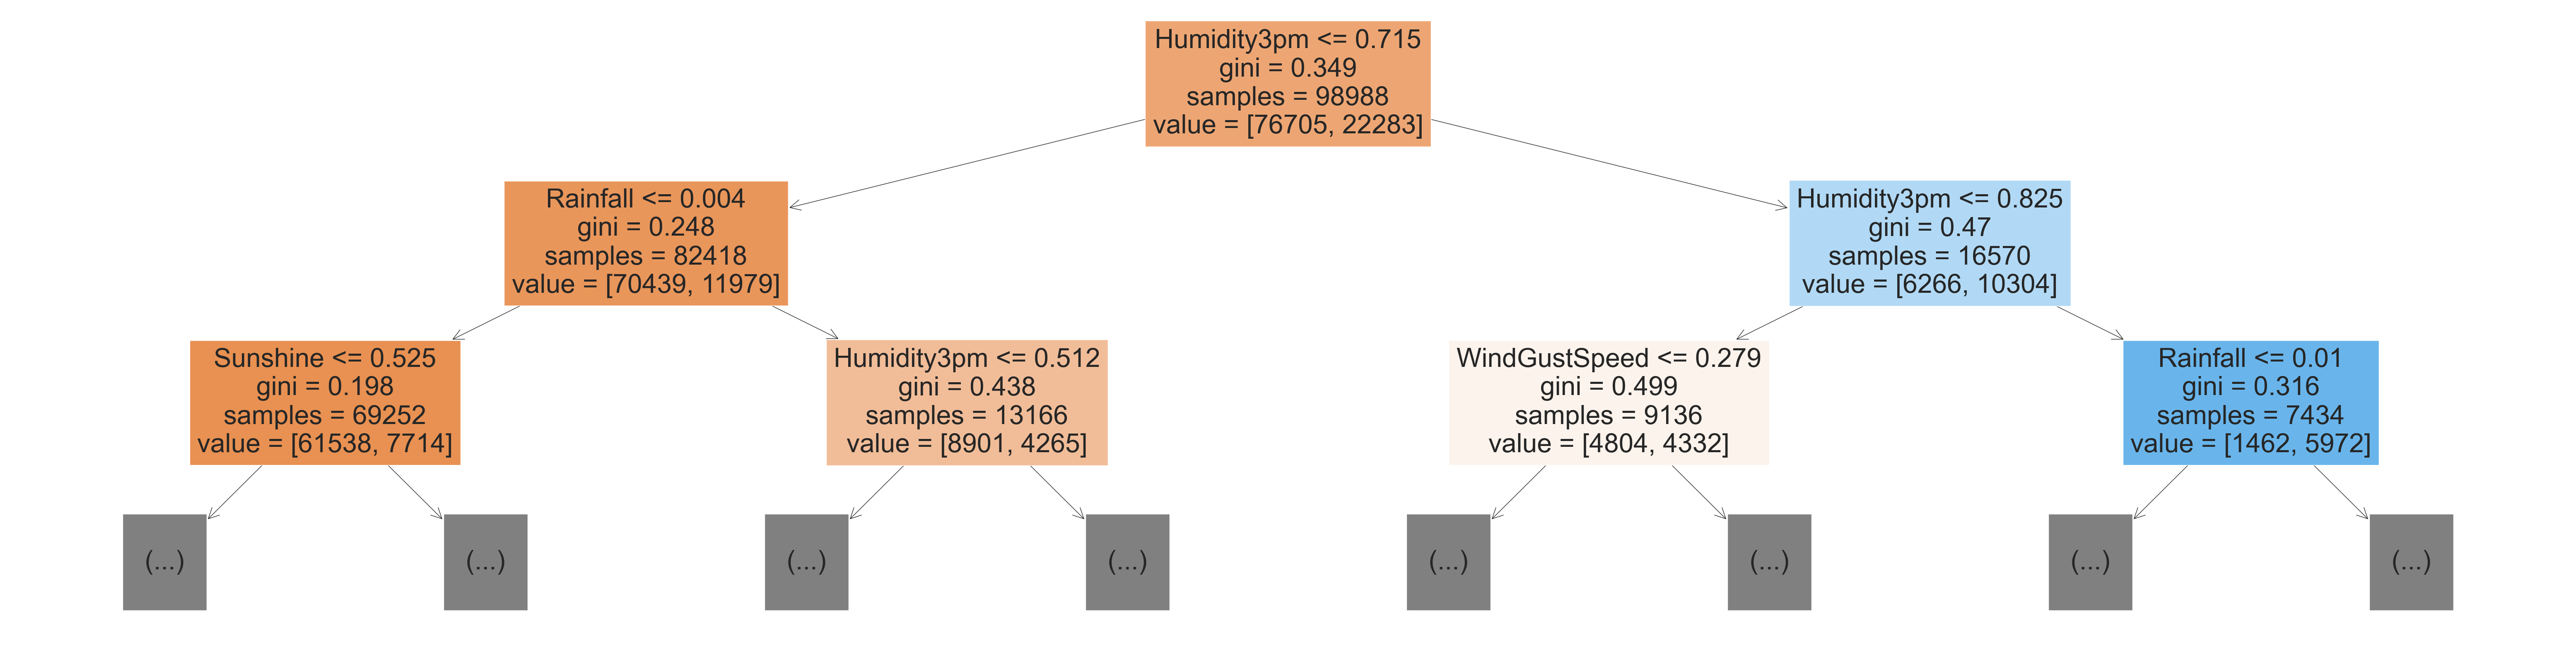

In [86]:
plt.figure(figsize=(80, 20))
plot_tree(DT, feature_names=X_test.columns.tolist(), max_depth=2, filled=True)


***gini is used to have best split by DT***

In [87]:
#it have 48 splits to get leaf notes
DT.tree_.max_depth

48

 # Feature Importance

In [88]:
DT.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [89]:
#seeing it in Dataframe

importance_df = pd.DataFrame({
    "feature" :X_train.columns,
    "Importance":DT.feature_importances_
}).sort_values("Importance",ascending = False)

In [90]:
importance_df

,feature,Importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


<Axes: title={'center': 'feature Importance'}, xlabel='Importance', ylabel='feature'>

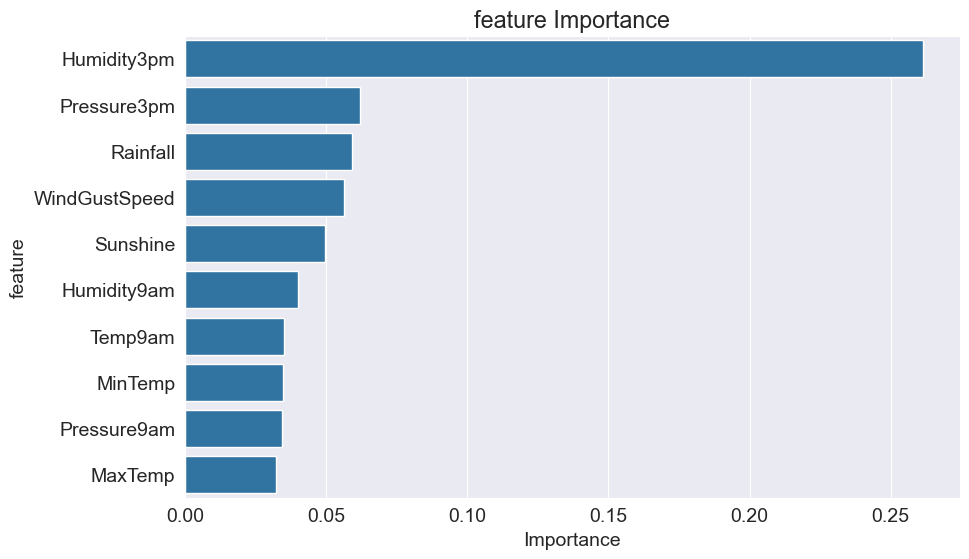

In [91]:
plt.title("feature Importance")
sns.barplot(data = importance_df.head(10) ,x = "Importance",y = "feature")

# HYPER PARAMETER TUNING

max_depth isliye use kar rhe hai k wo training dataset k sari example ko memorize karke train hojai ga or overfit hoga ,ab max_depth kare ga ye k ye srf three nodes taq expand karega decission tree ko tu is se hoga ye hamara algo exmaple ko memorize karne ki bajai data me se trends pick kare ga jo k Machine learning algo ko chaiye hota hai , is se hum overfitting se bhi bachenge.

In [92]:
model = DecisionTreeClassifier(max_depth = 3,random_state=42)

In [93]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [95]:
model.score(X_test,y_test)

0.8235928235928236

In [97]:
#Now model is predicting right as we fixes maxdepth cauing it to learn pattern from data not memorizing the dataset
model.score(X_val,val_target)

0.8334397307178921

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

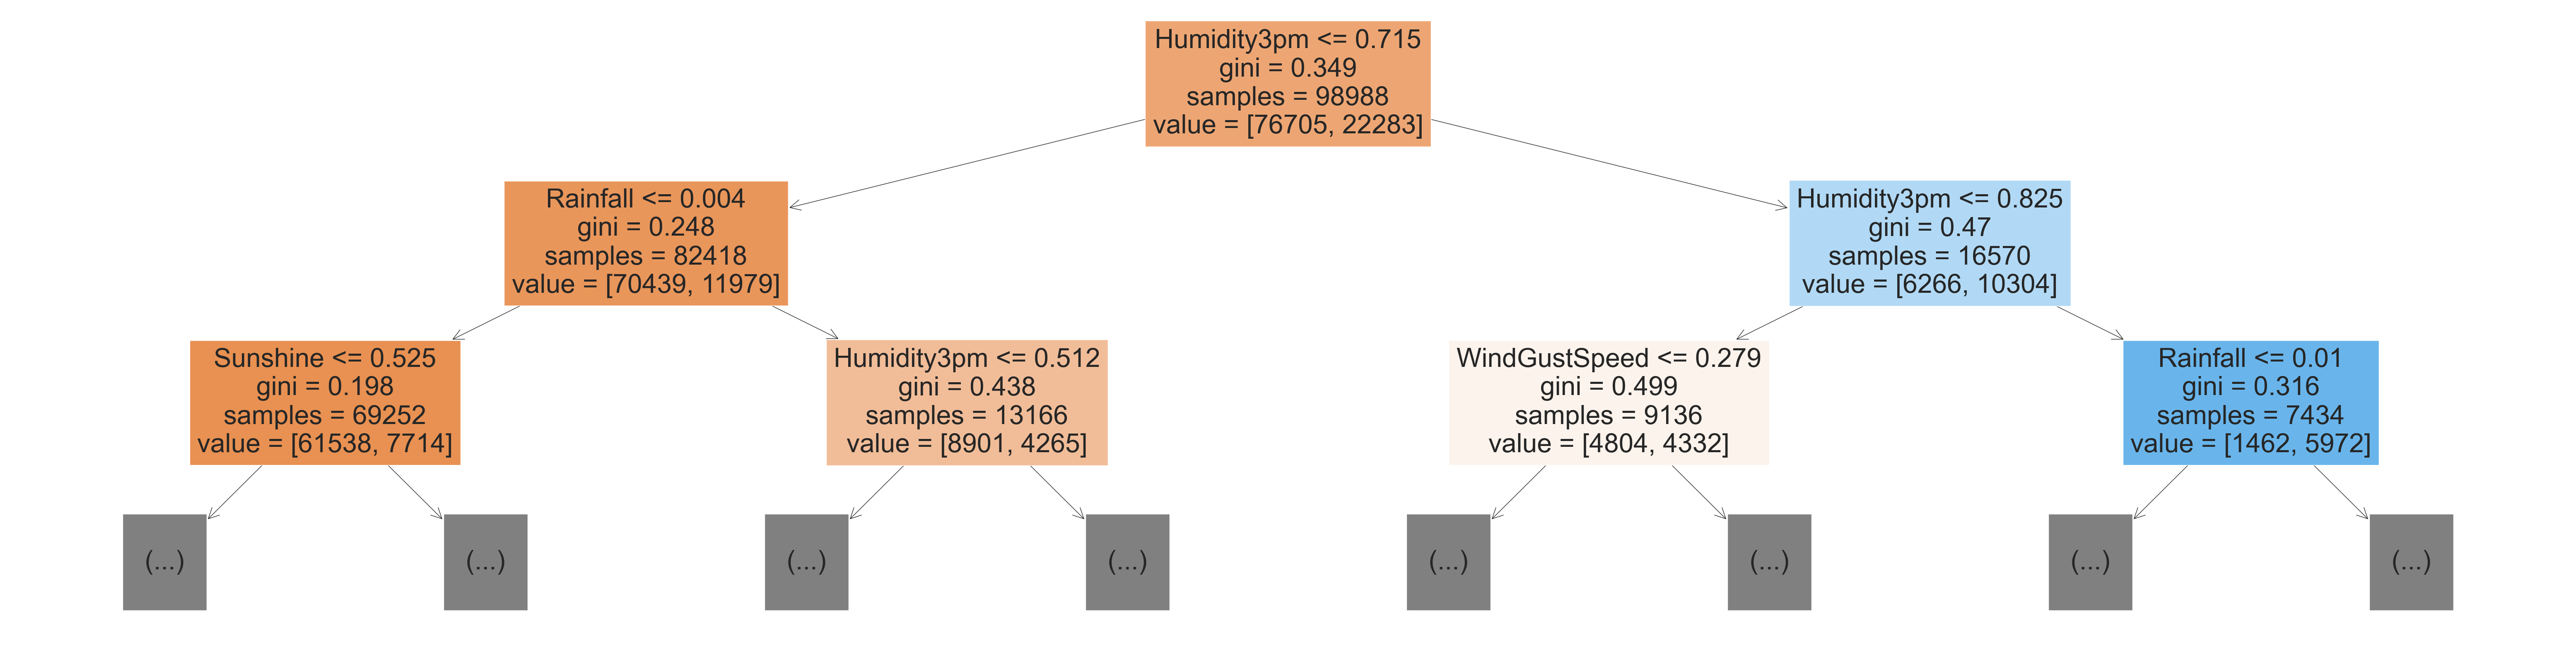

In [98]:
plt.figure(figsize=(80, 20))
plot_tree(model, feature_names=X_test.columns.tolist(), max_depth=2, filled=True)

***Trying to find best depth***

Finding max depth or reducing the error of a ML algo is called ***REGULARIZATION***

In [106]:
def maxdeptherror(md):
    model = DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(X_train,y_train)
    train_error = model.score(X_train,y_train)
    test_error = model.score(X_test,y_test)
    val_inp = model.score(X_val,val_target)
    return {"Max Depth":md ,"Training Accuracy":train_error , "Test_Accuracy":test_error,"Validation Accuracy":val_inp}

In [107]:
error_df = pd.DataFrame([maxdeptherror(md) for md in range(1,21)])

So the best maxdepth is 7

In [109]:
error_df

,Max Depth,Training Accuracy,Test_Accuracy,Validation Accuracy
0,1,0.815685,0.808462,0.822065
1,2,0.820453,0.815893,0.827288
2,3,0.829131,0.823593,0.833440
3,4,0.834293,0.823246,0.835645
4,5,0.839324,0.828559,0.840926
5,6,0.843729,0.830330,0.842725
6,7,0.846688,0.831062,0.845395
7,8,0.852194,0.833526,0.841971
8,9,0.859094,0.832833,0.843422
9,10,0.867055,0.829406,0.842667


as you can see the training data is getting good after each depth but test and valiation data at certain point starts reducing their accuracy this is because when max depth go up it will start memorizing the data wheter to find the patterns in it so this is why when new data comes it will go on a worse condition

This scenario called ***OVER FITTING***

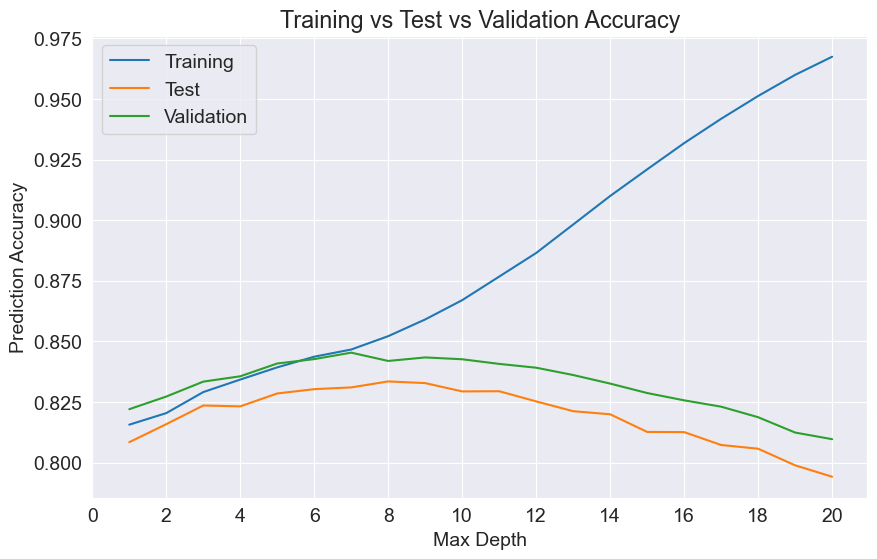

In [112]:
plt.figure()
plt.plot(error_df["Max Depth"],error_df["Training Accuracy"])
plt.plot(error_df["Max Depth"],error_df["Test_Accuracy"])
plt.plot(error_df["Max Depth"],error_df["Validation Accuracy"])
plt.title("Training vs Test vs Validation Accuracy")
plt.xticks(range(0,21,2))
plt.xlabel("Max Depth")
plt.ylabel("Prediction Accuracy")
plt.legend(["Training","Test","Validation"])

***IT CAN ALSO BE SEEN IN ANOTHER WAY LIKE ERROR***

In [113]:
def maxdeptherror(md):
    model = DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(X_train,y_train)
    train_error = 1 - model.score(X_train,y_train)
    test_error = 1 - model.score(X_test,y_test)
    val_inp = 1 - model.score(X_val,val_target)
    return {"Max Depth":md ,"Training Accuracy":train_error , "Test_Accuracy":test_error,"Validation Accuracy":val_inp}

In [114]:
error_df = pd.DataFrame([maxdeptherror(md) for md in range(1,21)])

In [115]:
error_df

,Max Depth,Training Accuracy,Test_Accuracy,Validation Accuracy
0,1,0.184315,0.191538,0.177935
1,2,0.179547,0.184107,0.172712
2,3,0.170869,0.176407,0.166560
3,4,0.165707,0.176754,0.164355
4,5,0.160676,0.171441,0.159074
5,6,0.156271,0.169670,0.157275
6,7,0.153312,0.168938,0.154605
7,8,0.147806,0.166474,0.158029
8,9,0.140906,0.167167,0.156578
9,10,0.132945,0.170594,0.157333


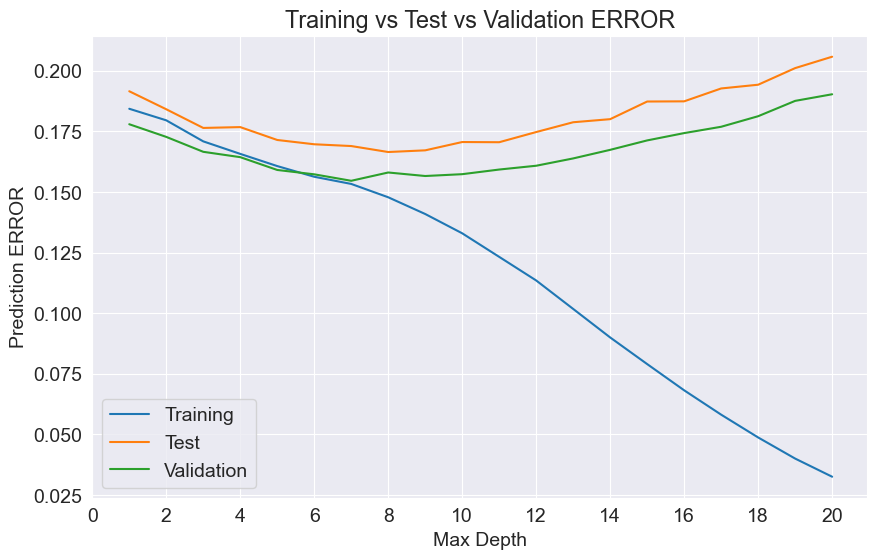

In [117]:
# THE LINE GOING DOWNWARDS SHOWING IT IS INCREASING ITS ACCURACY BY DECREASING ERROR AND ANOTHER 2 ERRORS GOING UPWARD INCREASING IN ERROR
plt.figure()
plt.plot(error_df["Max Depth"],error_df["Training Accuracy"])
plt.plot(error_df["Max Depth"],error_df["Test_Accuracy"])
plt.plot(error_df["Max Depth"],error_df["Validation Accuracy"])
plt.title("Training vs Test vs Validation ERROR")
plt.xticks(range(0,21,2))
plt.xlabel("Max Depth")
plt.ylabel("Prediction ERROR")
plt.legend(["Training","Test","Validation"])

In [120]:
"1:22:10"

'1:22:10'